## Ocean Stats

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
print("Last update:", date.today())
%matplotlib inline

In [2]:
# empty parametrizable cell 

cluster_scheduler_address = None

In [3]:
# Parameters
not_casename = "placeholder-casename"
cluster_scheduler_address = "tcp://10.18.206.48:44575"
subset_kwargs = {}


## Connecting to cluster

In [4]:
from dask.distributed import Client

if cluster_scheduler_address is None:
    pass
else:
    client = Client(cluster_scheduler_address)
    
    client

In [5]:
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 15})

### Globally-averaged T & S

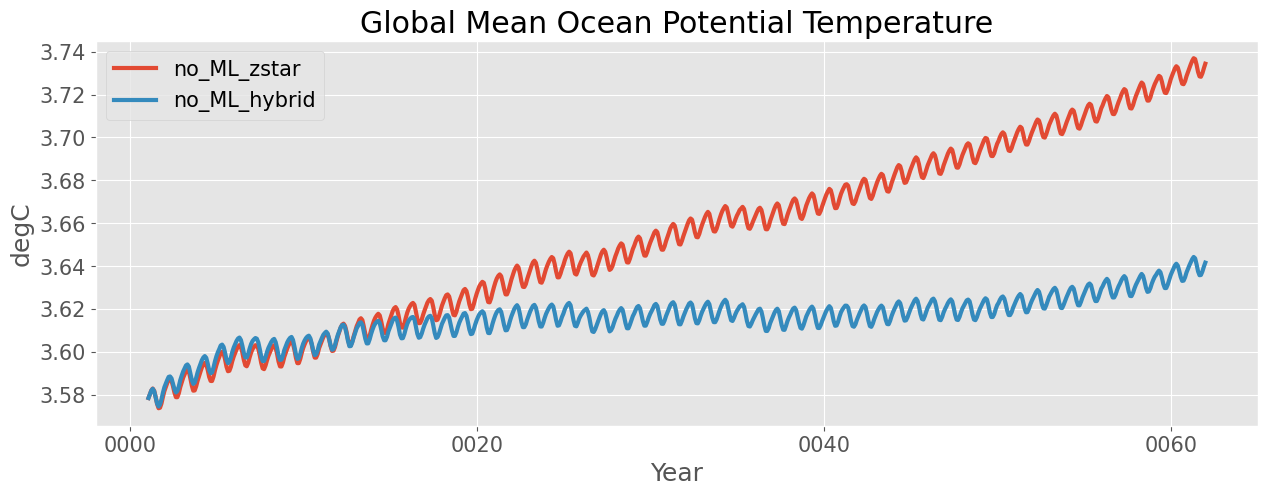

In [6]:
fig, ax = plt.subplots()
for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c))
  ds['thetaoga'].plot(ax=ax, label=l, lw=3)
    
ax.set_title(ds.thetaoga.attrs['long_name'])
ax.set_ylabel(ds.thetaoga.attrs['units'])
ax.set_xlabel('Year')
ax.legend();

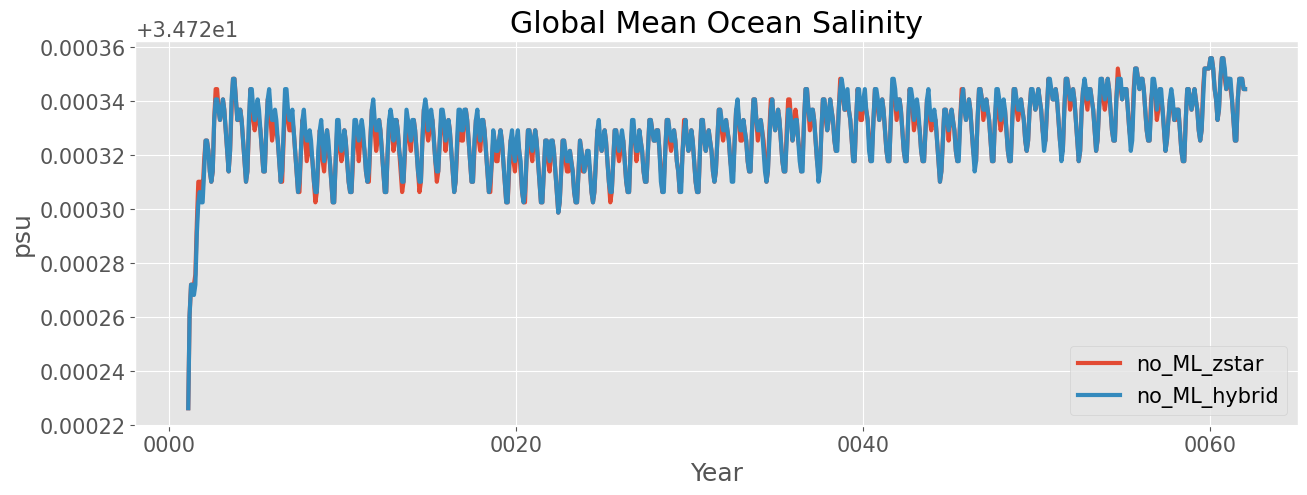

In [7]:
fig, ax = plt.subplots()
for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_mon_ave_global_means.nc'.format(c))
  ds['soga'].plot(ax=ax, label=l, lw=3)
    
ax.set_title(ds.soga.attrs['long_name'])
ax.set_ylabel(ds.soga.attrs['units'])
ax.set_xlabel('Year')
ax.legend();

In [8]:
ocean_stats = []
for c, l, p in zip(casename,label, ocn_path):
  ds = xr.open_dataset(p+'{}_ocean.stats.nc'.format(c))
  stats_monthly = ds.resample(time="1M", 
                               closed='left',
                               keep_attrs='True').mean('time', keep_attrs=True)
  ocean_stats.append(stats_monthly) 

### Truncations

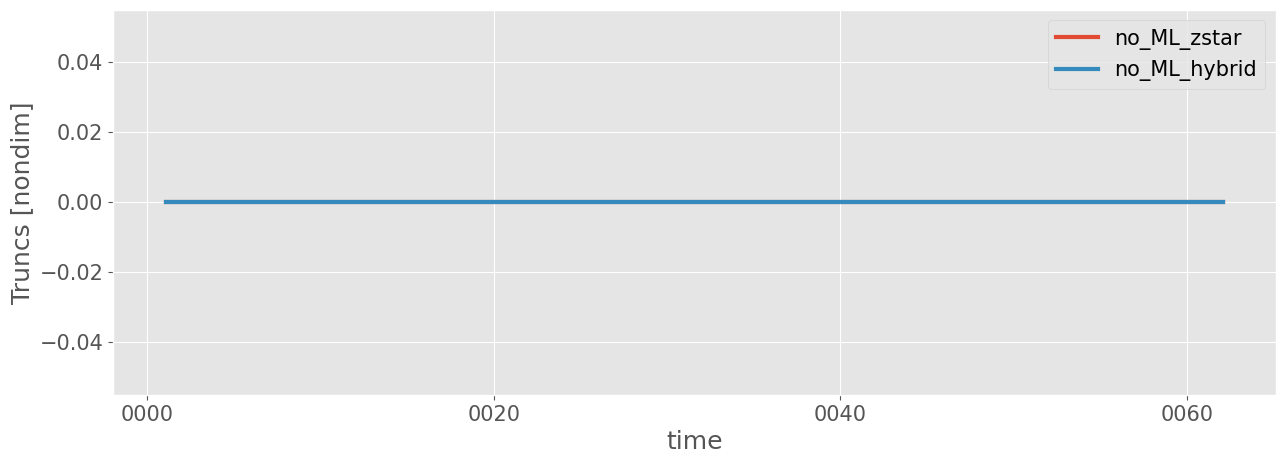

In [9]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Truncs.plot(ax=ax,label=l,lw=3);
    
ax.legend()

### Maximum finite-volume CFL

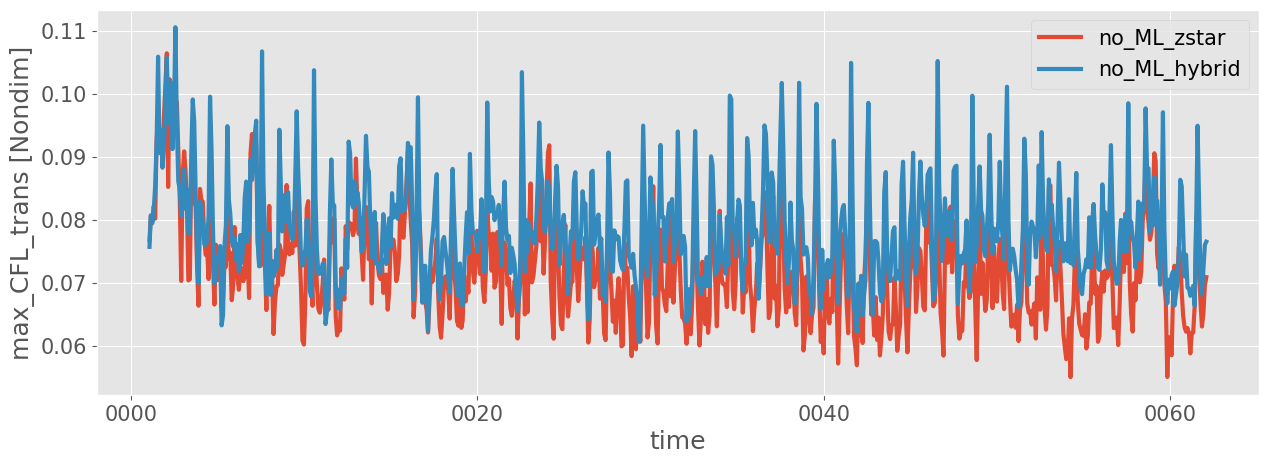

In [10]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].max_CFL_trans.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Maximum finite-difference CFL

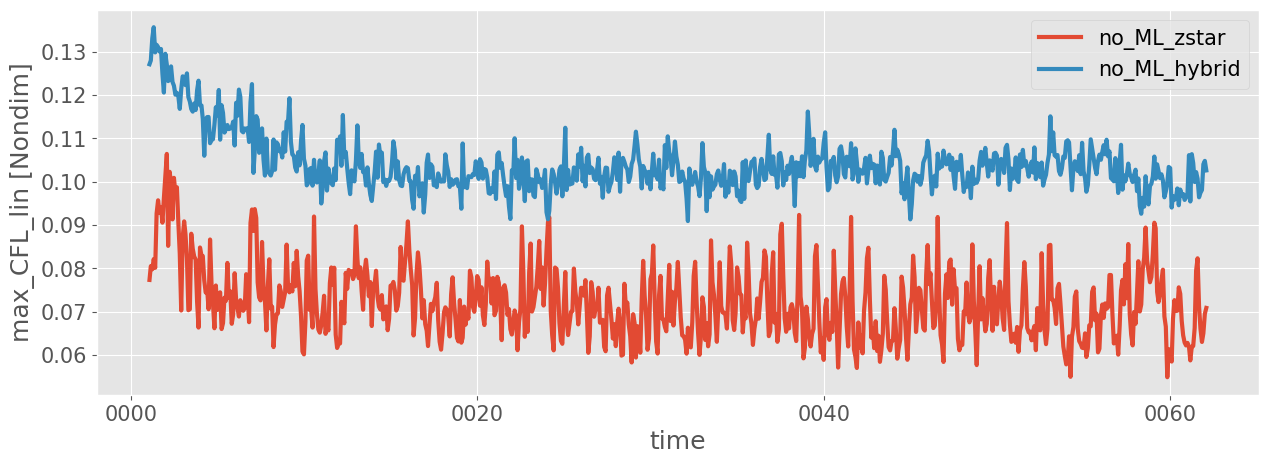

In [11]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].max_CFL_lin.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Maximum CFL

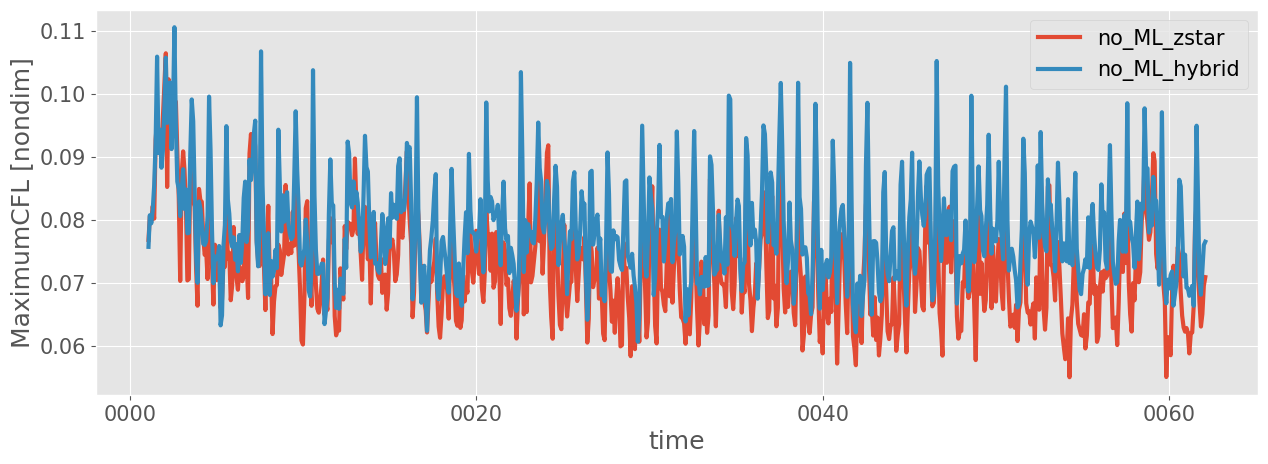

In [12]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MaximumCFL.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Energy/Mass

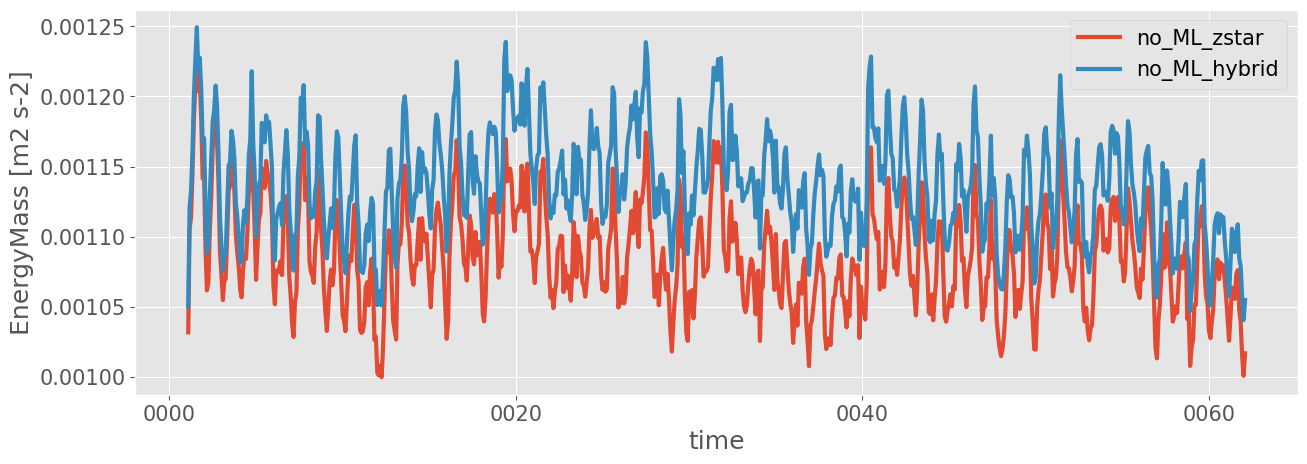

In [13]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].EnergyMass.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Mean Sea Level

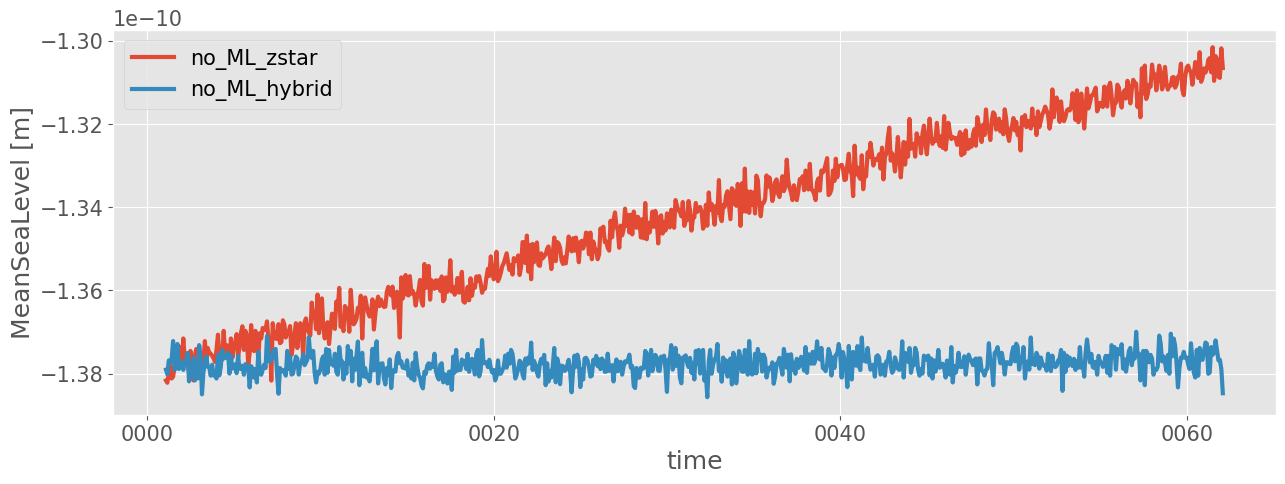

In [14]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanSeaLevel.plot.line(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Mass

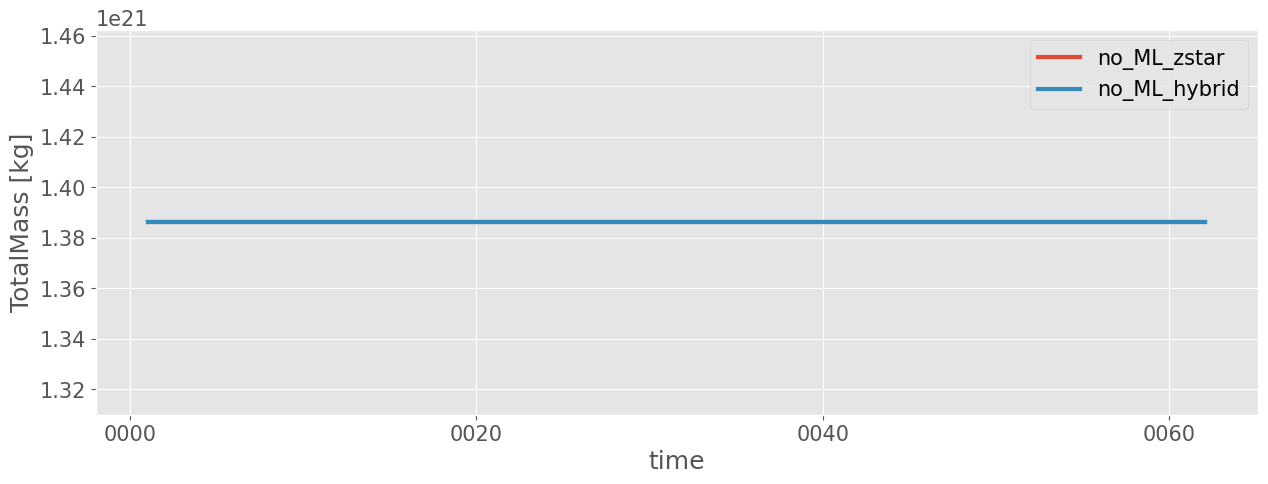

In [15]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].TotalMass.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Mean Salinity

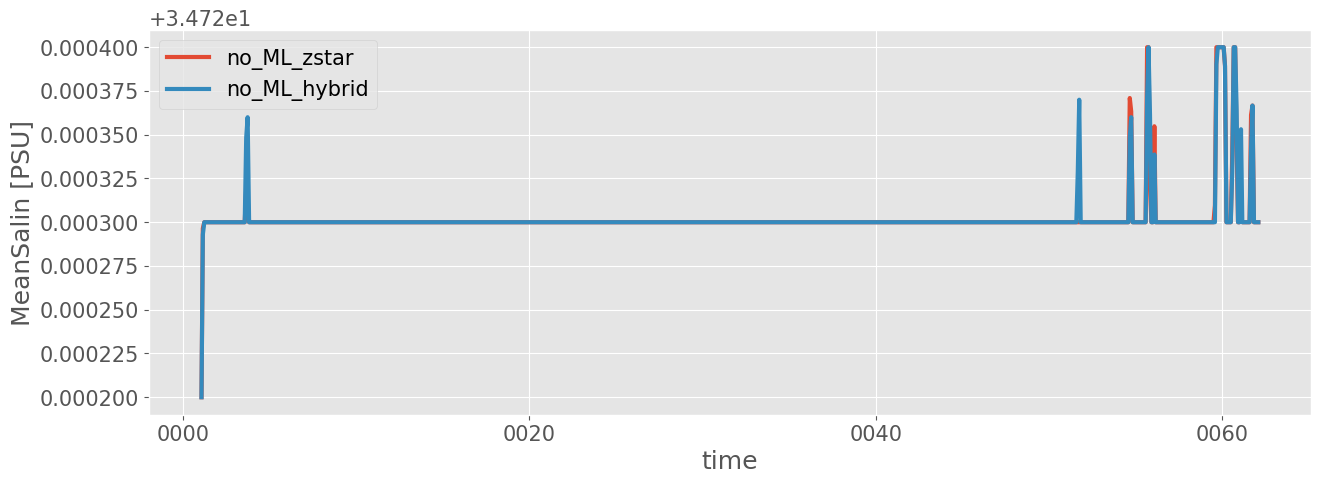

In [16]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanSalin.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Mean Temperature

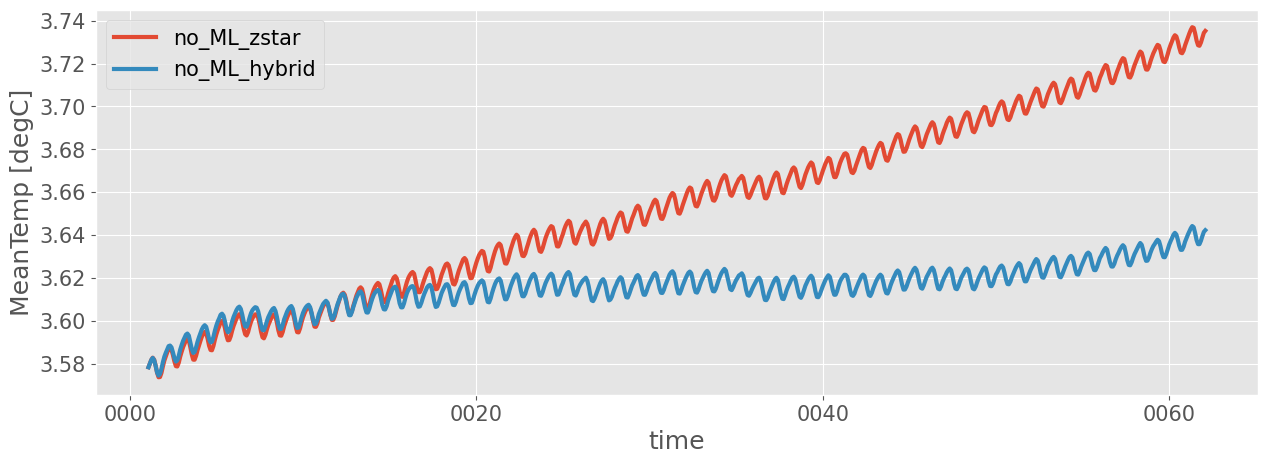

In [17]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].MeanTemp.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Energy

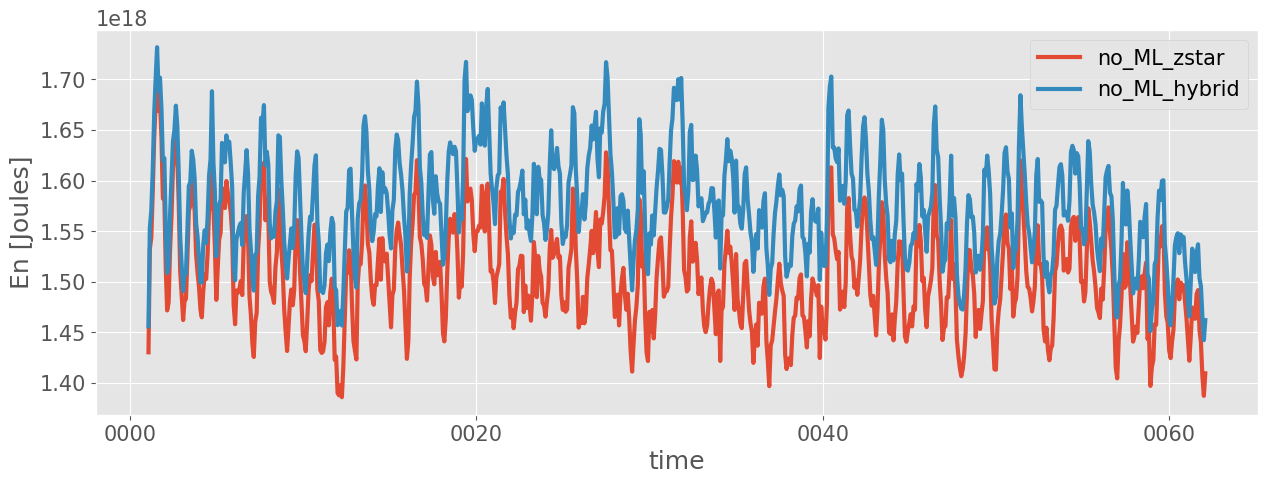

In [18]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].En.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Available Potential Energy

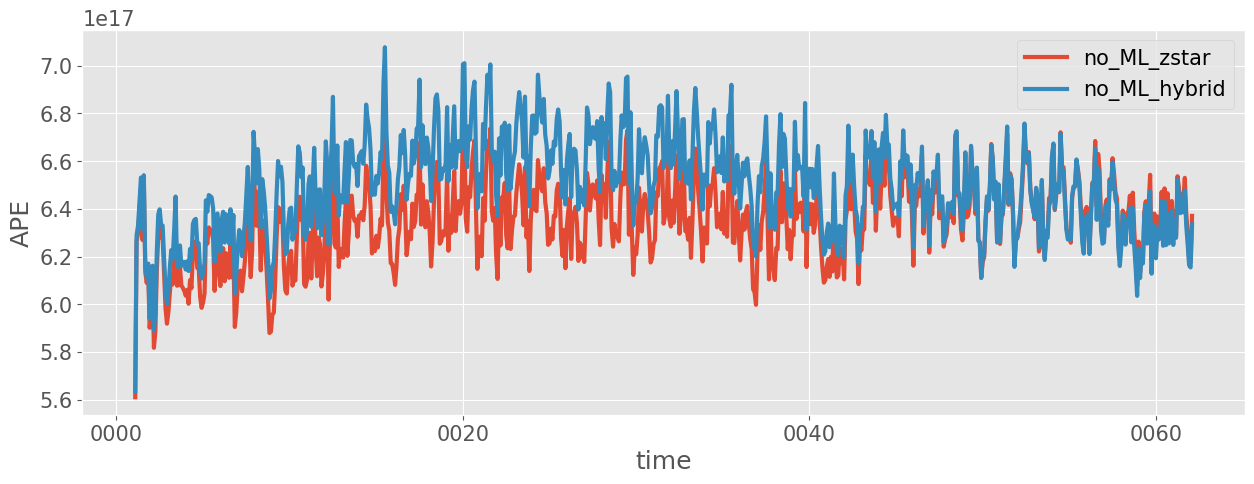

In [19]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].APE.sum(axis=1,
                      keep_attrs=True).plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Salt

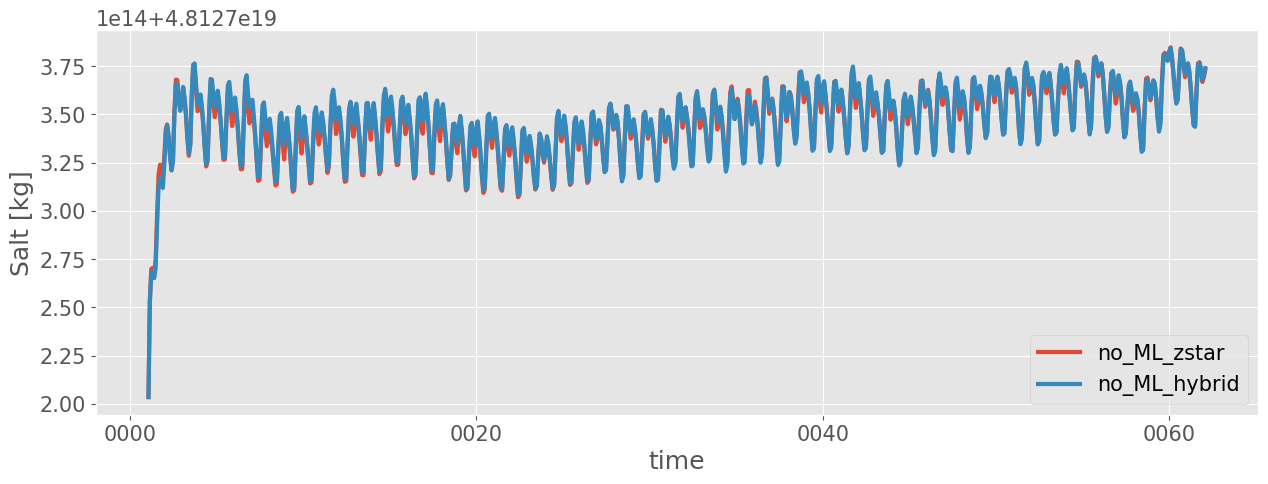

In [20]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Salt Change between Entries

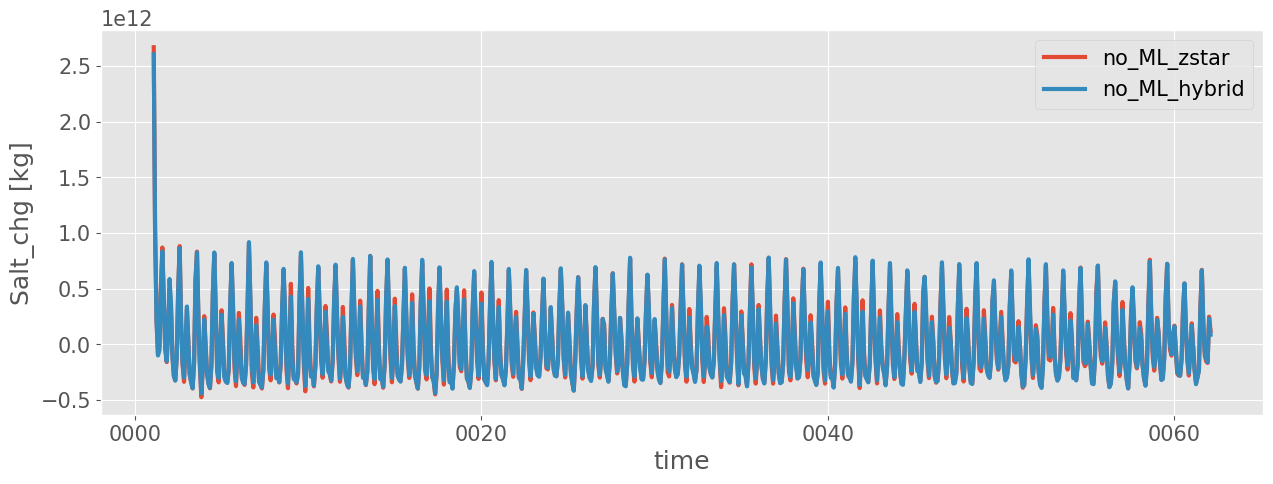

In [21]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt_chg.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Anomalous Total Salt Change

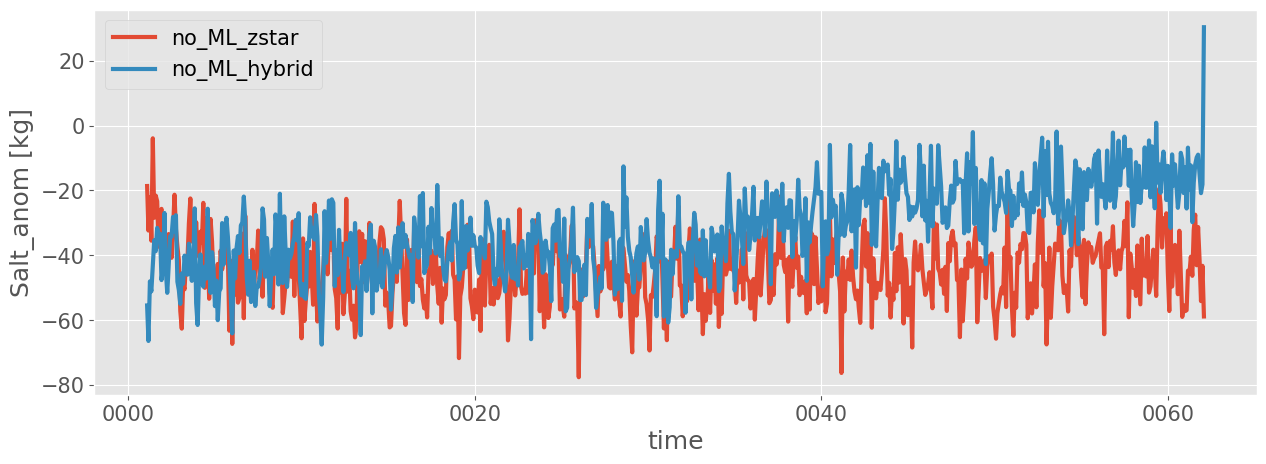

In [22]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Salt_anom.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Heat

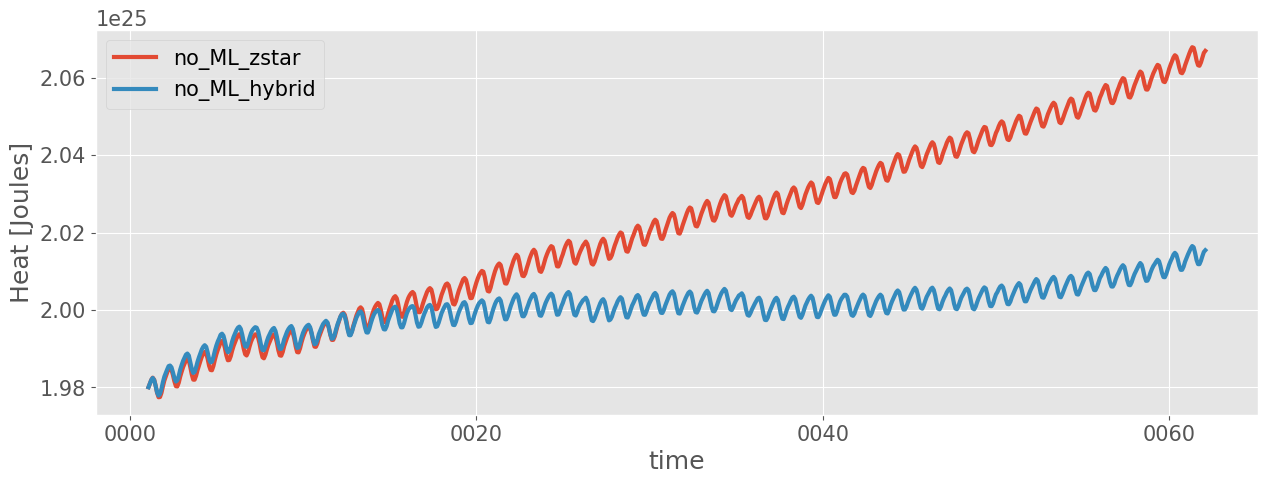

In [23]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Total Heat Change between Entries

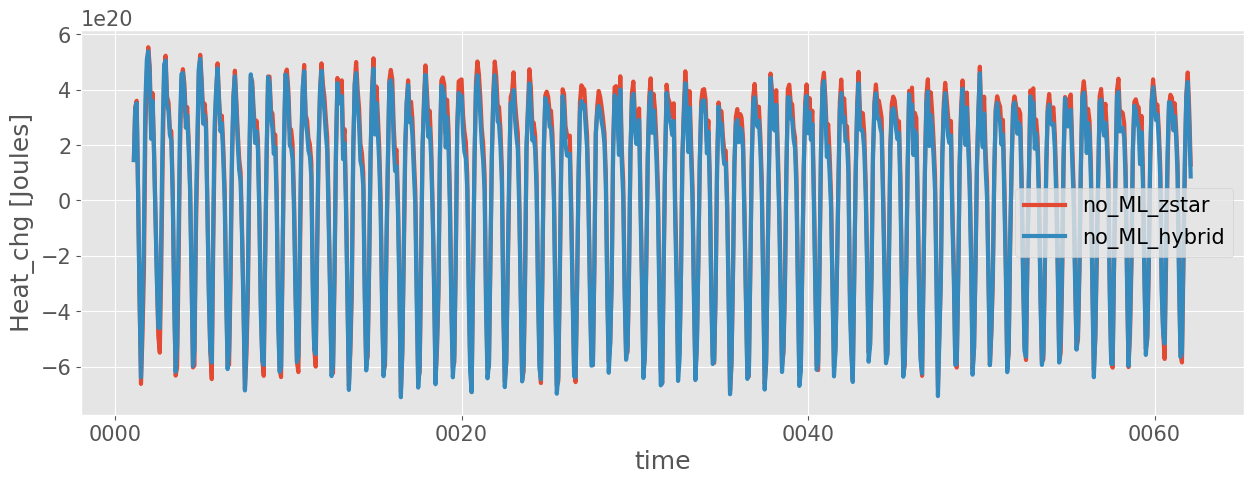

In [24]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat_chg.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Anomalous Total Heat Change

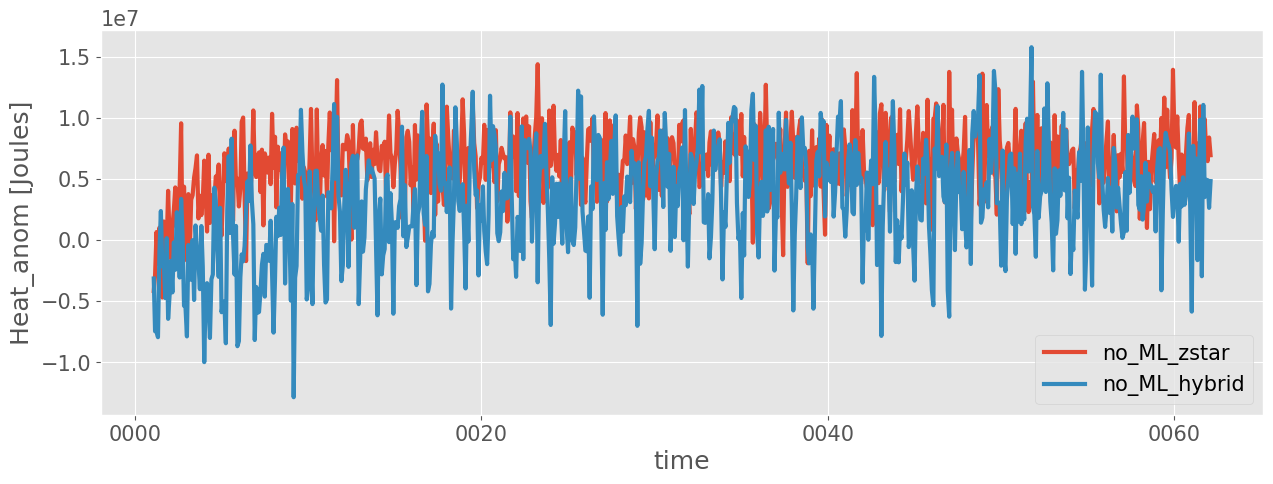

In [25]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].Heat_anom.plot(ax=ax,label=l,lw=3);
    
ax.legend();

### Age

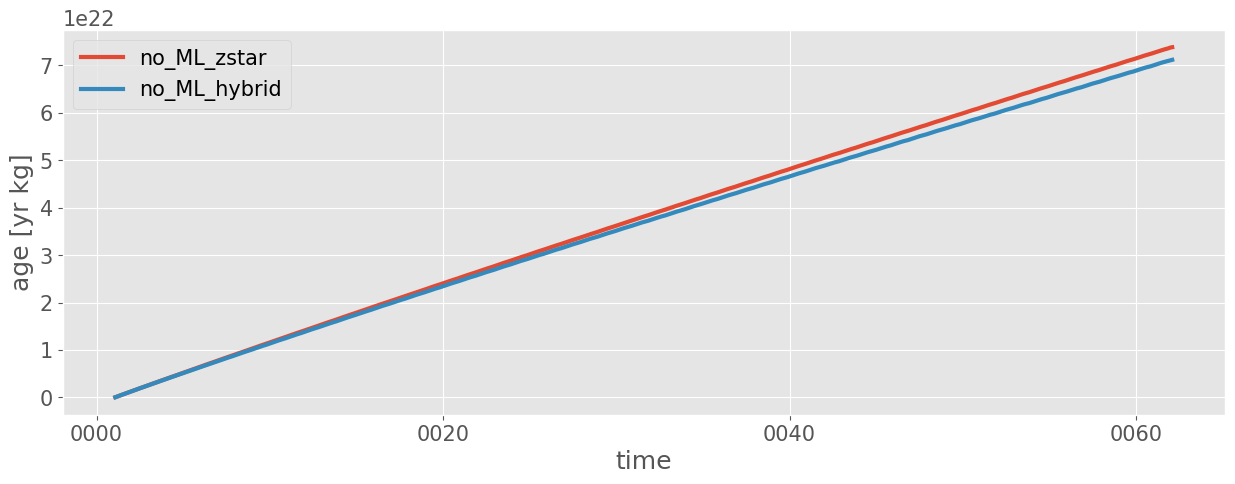

In [26]:
fig, ax = plt.subplots()
for i,l in zip(range(len(label)), label):
  ocean_stats[i].age.plot(ax=ax,label=l,lw=3);
    
ax.legend();